Customer Churn Prediction

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data
cus_churn_data = pd.read_csv('customer_churn_dataset.csv')

In [3]:
#look at top 5 records
cus_churn_data.head()

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.0

In [4]:
cus_churn_data.shape

(440833, 12)

In [5]:
cus_churn_data.columns.tolist()

['CustomerID',
 'Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [6]:
# Checking the data types of all the columns
cus_churn_data.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
cus_churn_data.describe()

CustomerID            Age         Tenure  Usage Frequency  \
count  440830.000000  440815.000000  440815.000000    440765.000000   
mean   225399.237536      39.372905      31.256491        15.807482   
std    129531.891245      12.442306      17.255688         8.586252   
min         2.000000      18.000000       1.000000         1.000000   
25%    113622.250000      29.000000      16.000000         9.000000   
50%    226126.500000      39.000000      32.000000        16.000000   
75%    337739.750000      48.000000      46.000000        23.000000   
max    449999.000000      65.000000      60.000000        30.000000   

       Support Calls  Payment Delay    Total Spend  Last Interaction  \
count  440737.000000  440754.000000  440825.000000     440776.000000   
mean        3.604544      12.965545     631.614604         14.481020   
std         3.070285       8.258030     240.802013          8.596222   
min         0.000000       0.000000     100.000000          1.000000   
25%         1.000000       6.000000     480.000000          7.000000   
50%         3.000000      12.000000     661.000000         14.000000   
75%         6.000000      19.000000     830.000000         22.000000   
max        10.000000      30.000000    1000.000000         30.000000   

               Churn  
count  440832.000000  
mean        0.567107  
std         0.495477  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

-75% customers have tenure less than 46 months.
-Average total spend is 631.61

In [8]:
fig = px.bar(cus_churn_data['Churn'].value_counts(),
             orientation='h',
             labels={"index": "Target Variable", "value": "Count"},
             title="Count of TARGET Variable per category",
             width=800, height=600)

fig.show()

In [9]:
target_instance = cus_churn_data["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "yellow"],
             title='Distribution of Churn')
fig.show()

Churn : 56.7%
Not-churn : 43.3%

In [10]:
cus_churn_data['Churn'].value_counts()

1.0    249999
0.0    190833
Name: Churn, dtype: int64

-Data is slightly imbalanced, ratio = 57:43

In [11]:
# Concise Summary of the dataframe
cus_churn_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440830 non-null  float64
 1   Age                440815 non-null  float64
 2   Gender             440744 non-null  object 
 3   Tenure             440815 non-null  float64
 4   Usage Frequency    440765 non-null  float64
 5   Support Calls      440737 non-null  float64
 6   Payment Delay      440754 non-null  float64
 7   Subscription Type  440772 non-null  object 
 8   Contract Length    440774 non-null  object 
 9   Total Spend        440825 non-null  float64
 10  Last Interaction   440776 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


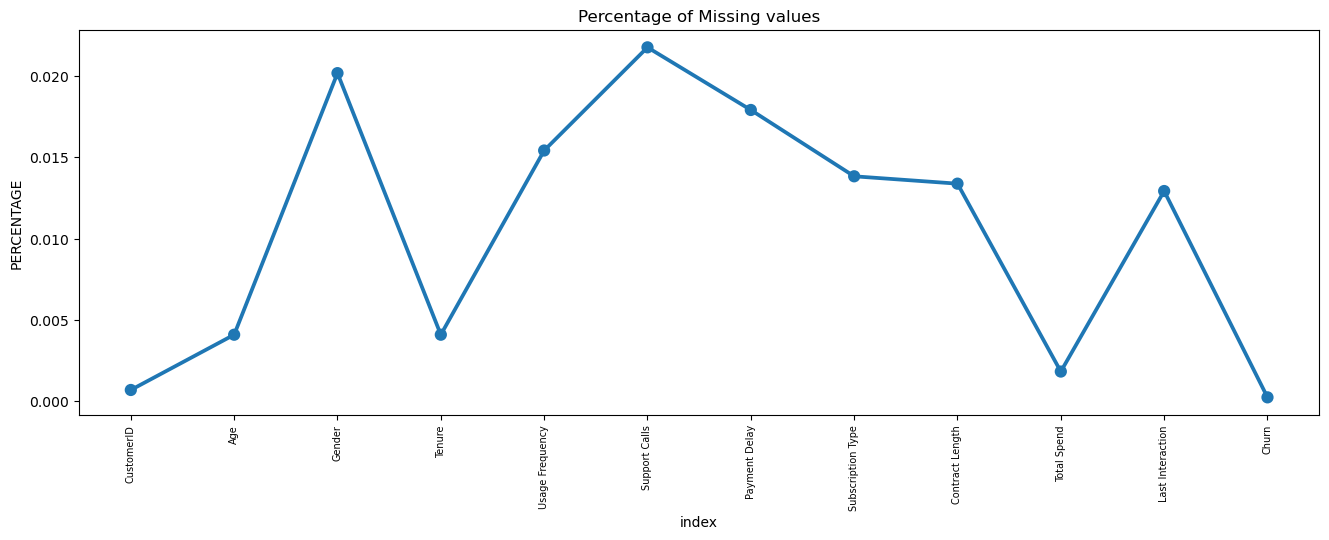

In [12]:
missing = pd.DataFrame((cus_churn_data.isnull().sum()) * 100 / cus_churn_data.shape[0]).reset_index()

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


In [13]:
#checking the total of missing values
cus_churn_data.isnull().sum()

CustomerID            3
Age                  18
Gender               89
Tenure               18
Usage Frequency      68
Support Calls        96
Payment Delay        79
Subscription Type    61
Contract Length      59
Total Spend           8
Last Interaction     57
Churn                 1
dtype: int64

In [14]:
cus_churn_data.isnull().mean()

CustomerID           0.000007
Age                  0.000041
Gender               0.000202
Tenure               0.000041
Usage Frequency      0.000154
Support Calls        0.000218
Payment Delay        0.000179
Subscription Type    0.000138
Contract Length      0.000134
Total Spend          0.000018
Last Interaction     0.000129
Churn                0.000002
dtype: float64

In [15]:
# Drop rows with missing values in the target variable
cus_churn_data = cus_churn_data.dropna(subset=['Churn'])

In [16]:
# Impute missing numerical values with the median
numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
cus_churn_data[numerical_cols] = cus_churn_data[numerical_cols].fillna(cus_churn_data[numerical_cols].median())

In [17]:
# Impute missing categorical values with the mode
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
cus_churn_data[categorical_cols] = cus_churn_data[categorical_cols].fillna(cus_churn_data[categorical_cols].mode().iloc[0])

### Data Cleaning

In [18]:
churn_data=cus_churn_data.copy()

In [19]:
# Convert Age to integer
churn_data['Age'] = cus_churn_data['Age'].astype(int)
churn_data['Tenure'] = cus_churn_data['Tenure'].astype(int)
churn_data['Usage Frequency'] = cus_churn_data['Usage Frequency'].astype(int)
churn_data['Support Calls'] = cus_churn_data['Support Calls'].astype(int)
churn_data['Payment Delay'] = cus_churn_data['Payment Delay'].astype(int)
churn_data['Last Interaction'] = cus_churn_data['Last Interaction'].astype(int)

# Convert Churn to binary
churn_data['Churn'] = cus_churn_data['Churn'].astype(int)


In [20]:
# Get the max tenure
print(churn_data['Tenure'].max())

60


In [21]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 60, 12)]

churn_data['Tenure_group'] = pd.cut(churn_data.Tenure, range(1, 68, 12), right=False, labels=labels)

In [22]:
churn_data['Tenure_group'].value_counts()

49 - 60    92329
37 - 48    91928
25 - 36    91488
1 - 12     85125
13 - 24    79962
Name: Tenure_group, dtype: int64

In [23]:
#drop column customerID and tenure
churn_data.drop(columns= ['CustomerID','Tenure'], axis=1, inplace=True)
churn_data.head()

Age  Gender  Usage Frequency  Support Calls  Payment Delay  \
0   30  Female               14              5             18   
1   65  Female                1             10              8   
2   55  Female                4              6             18   
3   58    Male               21              7              7   
4   23    Male               20              5              8   

  Subscription Type Contract Length  Total Spend  Last Interaction  Churn  \
0          Standard          Annual        932.0                17      1   
1             Basic         Monthly        557.0                 6      1   
2             Basic       Quarterly        185.0                 3      1   
3          Standard         Monthly        396.0                29      1   
4             Basic         Monthly        617.0                20      1   

  Tenure_group  
0      37 - 48  
1      49 - 60  
2      13 - 24  
3      37 - 48  
4      25 - 36

### Exploratory Data Analysis

Univariate Analysis 

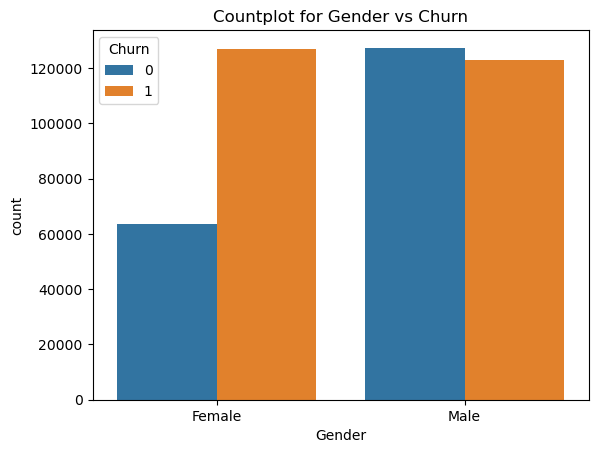

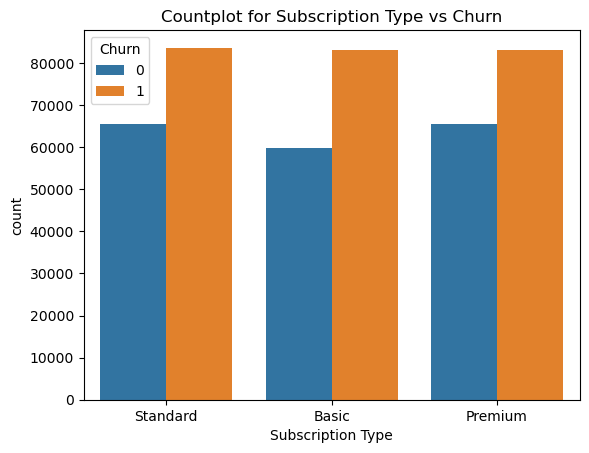

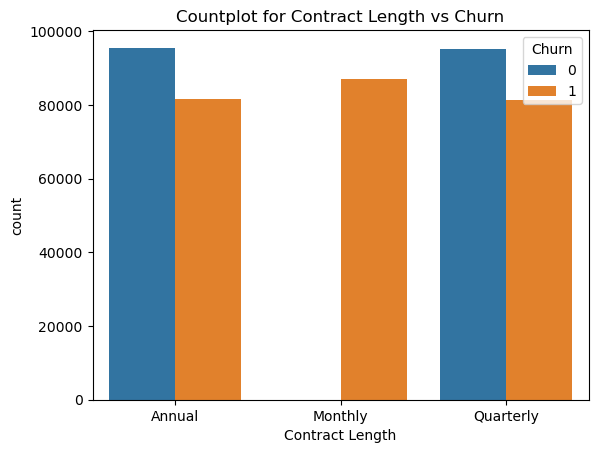

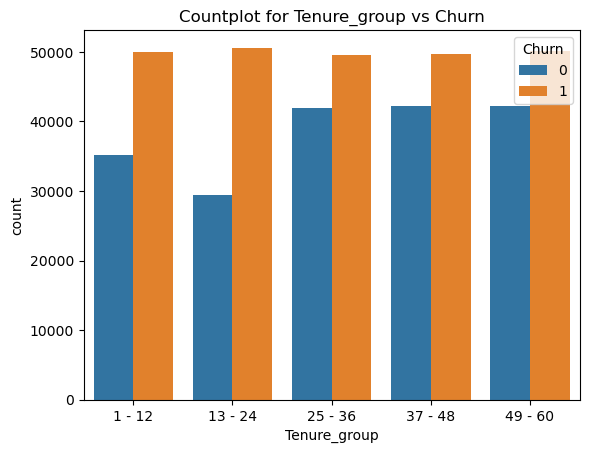

In [24]:
for i, predictor in enumerate(['Gender', 'Subscription Type', 'Contract Length', 'Tenure_group']):
    plt.figure(i)
    sns.countplot(data=churn_data, x=predictor, hue='Churn')
    plt.title(f'Countplot for {predictor} vs Churn')
    plt.show()

Convert all the categorical variables into dummy variables

In [25]:
churn_data_dummies = pd.get_dummies(churn_data)
churn_data_dummies.head()

Age  Usage Frequency  Support Calls  Payment Delay  Total Spend  \
0   30               14              5             18        932.0   
1   65                1             10              8        557.0   
2   55                4              6             18        185.0   
3   58               21              7              7        396.0   
4   23               20              5              8        617.0   

   Last Interaction  Churn  Gender_Female  Gender_Male  \
0                17      1              1            0   
1                 6      1              1            0   
2                 3      1              1            0   
3                29      1              0            1   
4                20      1              0            1   

   Subscription Type_Basic  Subscription Type_Premium  \
0                        0                          0   
1                        1                          0   
2                        1                          0   
3                        0                          0   
4                        1                          0   

   Subscription Type_Standard  Contract Length_Annual  \
0                           1                       1   
1                           0                       0   
2                           0                       0   
3                           1                       0   
4                           0                       0   

   Contract Length_Monthly  Contract Length_Quarterly  Tenure_group_1 - 12  \
0                        0                          0                    0   
1                        1                          0                    0   
2                        0                          1                    0   
3                        1                          0                    0   
4                        1                          0                    0   

   Tenure_group_13 - 24  Tenure_group_25 - 36  Tenure_group_37 - 48  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     0                     1   
4                     0                     1                     0   

   Tenure_group_49 - 60  
0                     0  
1                     1  
2                     0  
3                     0  
4                     0

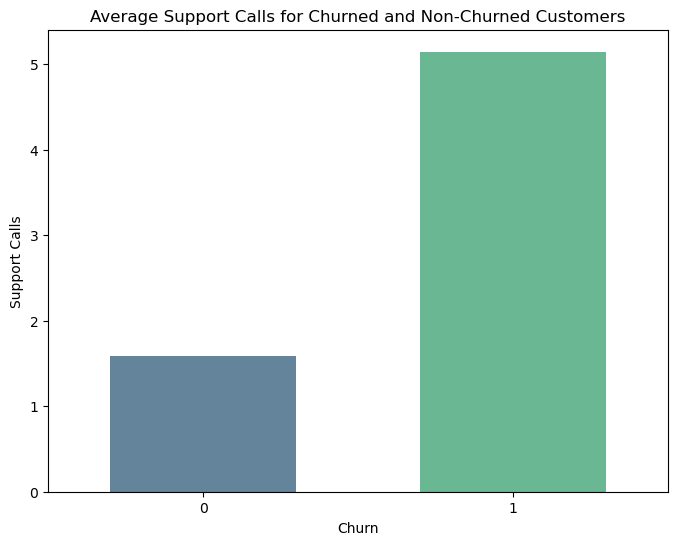

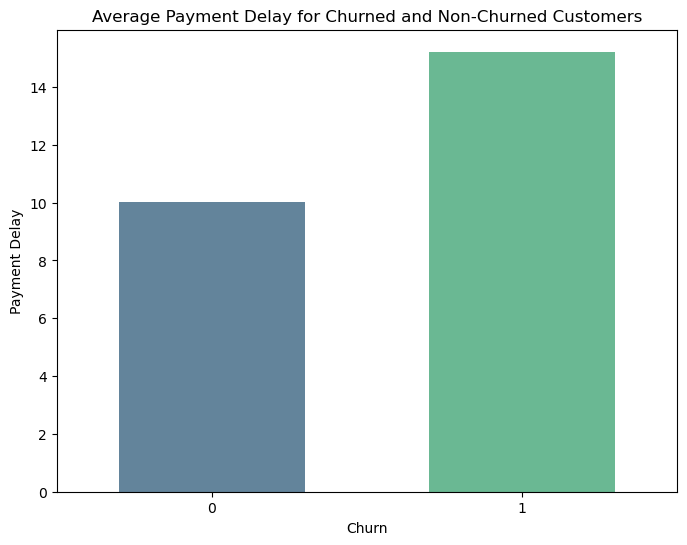

In [71]:
# Plot 1
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='Support Calls', data=churn_data, errorbar=None, palette="viridis",  alpha=0.8, capsize=0.1, width=0.6)
plt.title('Average Support Calls for Churned and Non-Churned Customers')
plt.show()

# Plot 2
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='Payment Delay', data=churn_data, errorbar=None, palette="viridis", alpha=0.8, capsize=0.1, width=0.6)
plt.title('Average Payment Delay for Churned and Non-Churned Customers')
plt.show()

Text(0.5, 1.0, 'Total Spend by Churn')

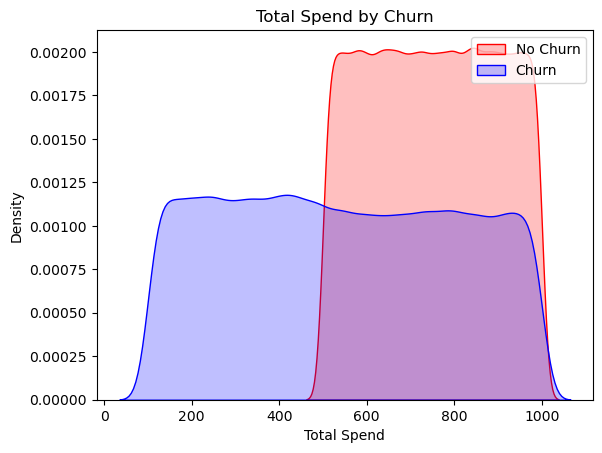

In [27]:
Tot = sns.kdeplot(churn_data_dummies['Total Spend'][(churn_data_dummies['Churn'] == 0)],
                  color="Red", fill=True)
Tot = sns.kdeplot(churn_data_dummies['Total Spend'][(churn_data_dummies['Churn'] == 1)],
                  ax=Tot, color="Blue", fill=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Spend')
Tot.set_title('Total Spend by Churn')


Corelation of all predictors with 'Churn'

<Axes: >

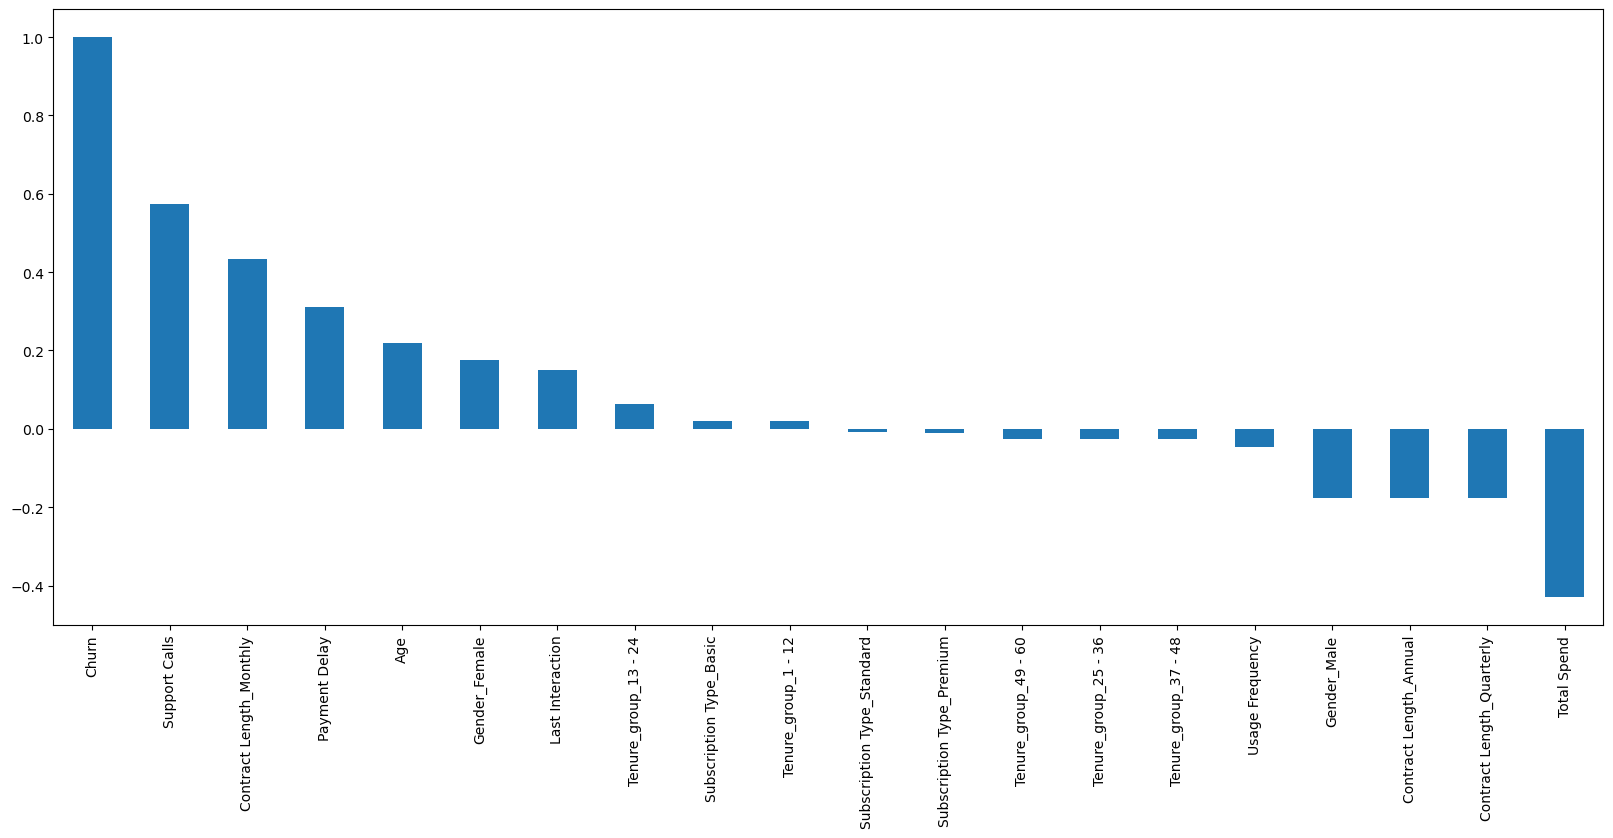

In [28]:
plt.figure(figsize=(20,8))
churn_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Derived Insight:

HIGH Churn can be seen in case of monthly contracts and factors like number of support calls,payment delay, age and last interaction seem to affect churning.

LOW Churn is seens in case of long term contracts and factors like usage frequency and total spend seem to have a low impact on churning.

Factors like subscription type and tenure have alomost NO impact on Churn.

This is also evident from the Heatmap below.

<Axes: >

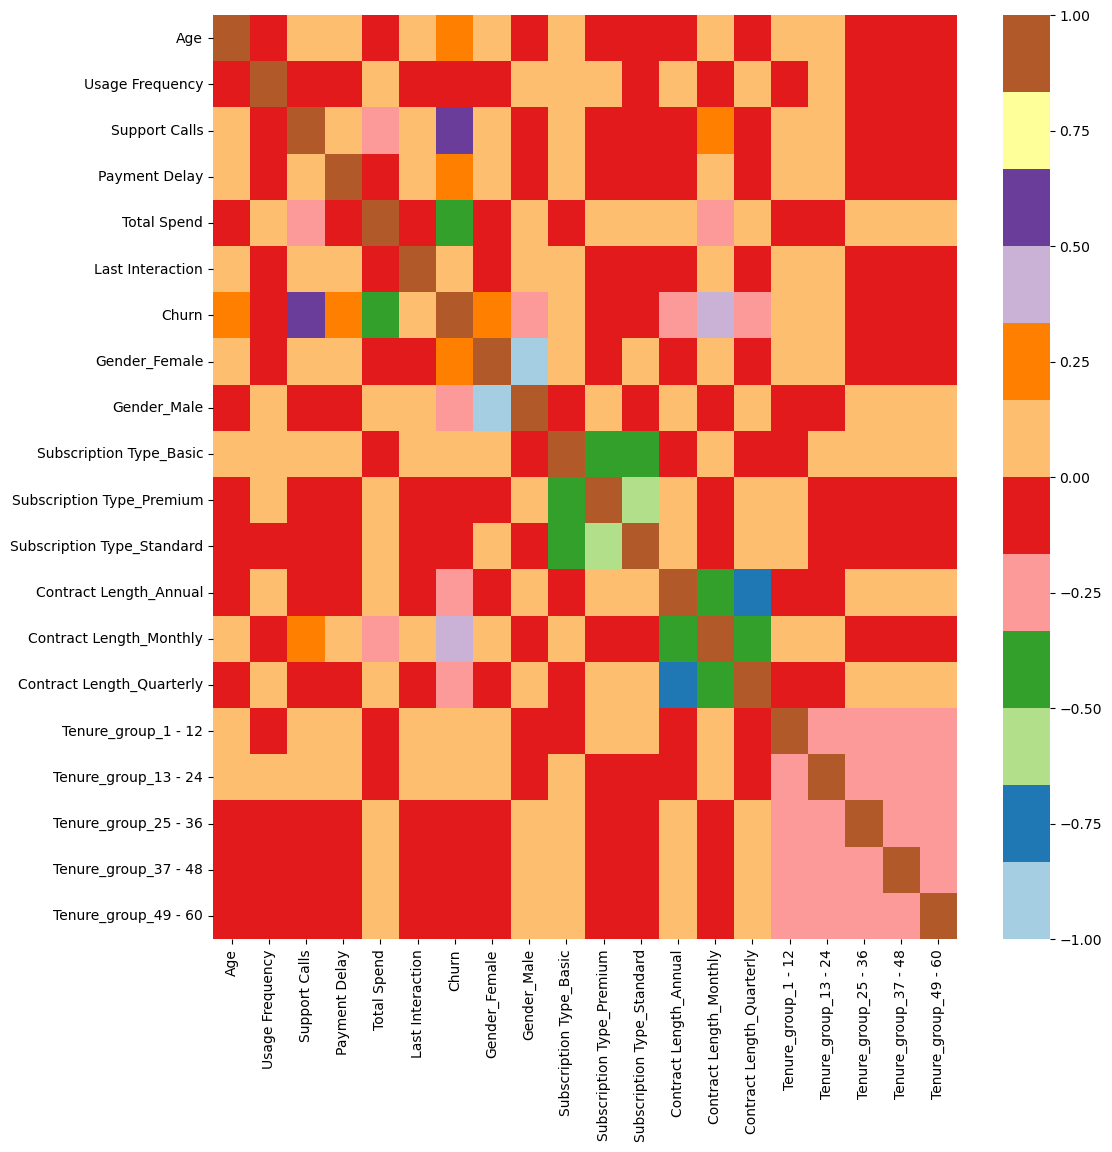

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(churn_data_dummies.corr(), cmap="Paired")

Bivariate Analysis

In [72]:
new_df1_target0=churn_data.loc[churn_data["Churn"]==0]
new_df1_target1=churn_data.loc[churn_data["Churn"]==1]

In [73]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

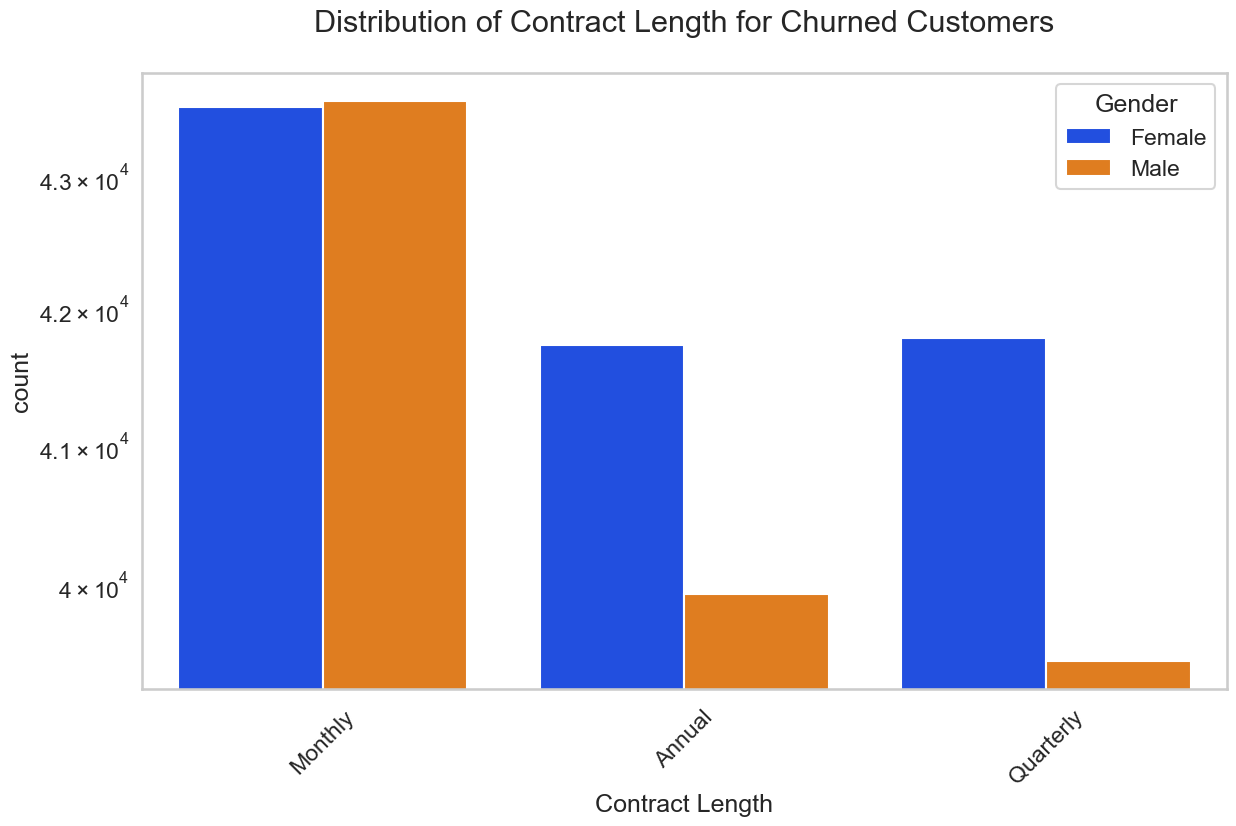

In [74]:
uniplot(new_df1_target1,col='Contract Length',title='Distribution of Contract Length for Churned Customers',hue='Gender')

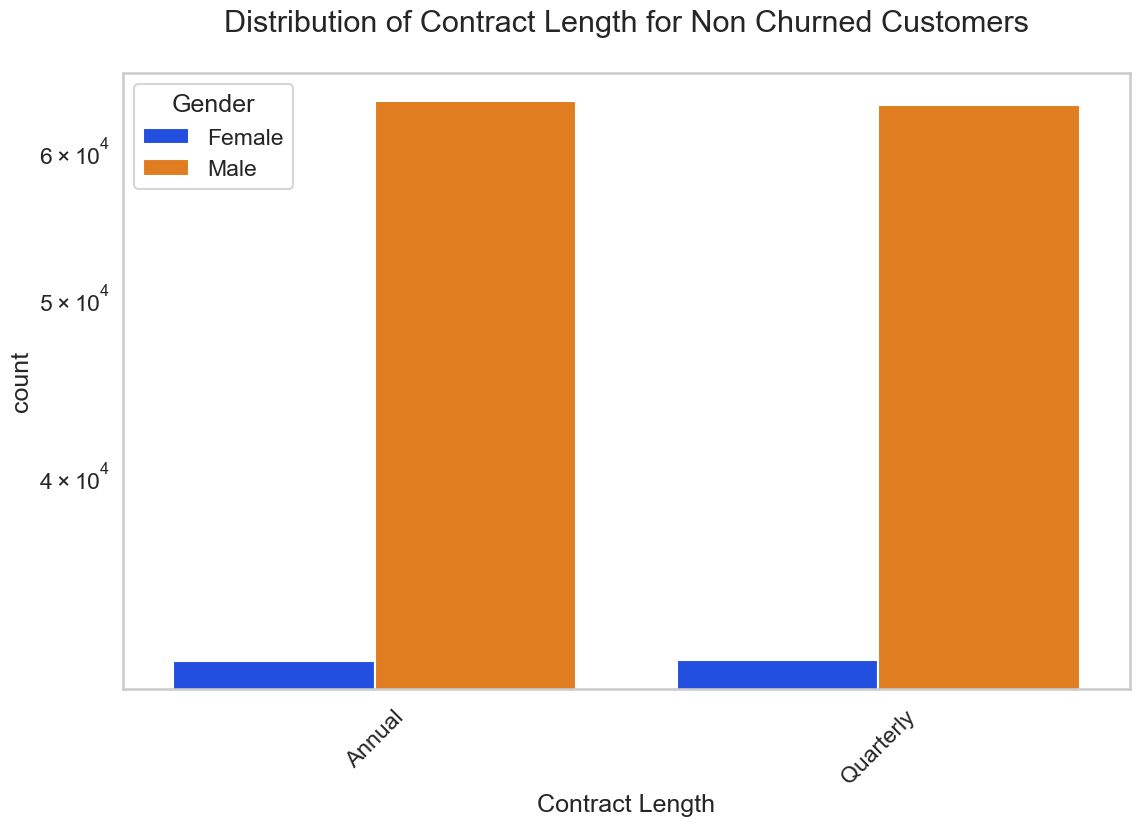

In [75]:
uniplot(new_df1_target0,col='Contract Length',title='Distribution of Contract Length for Non Churned Customers',hue='Gender')

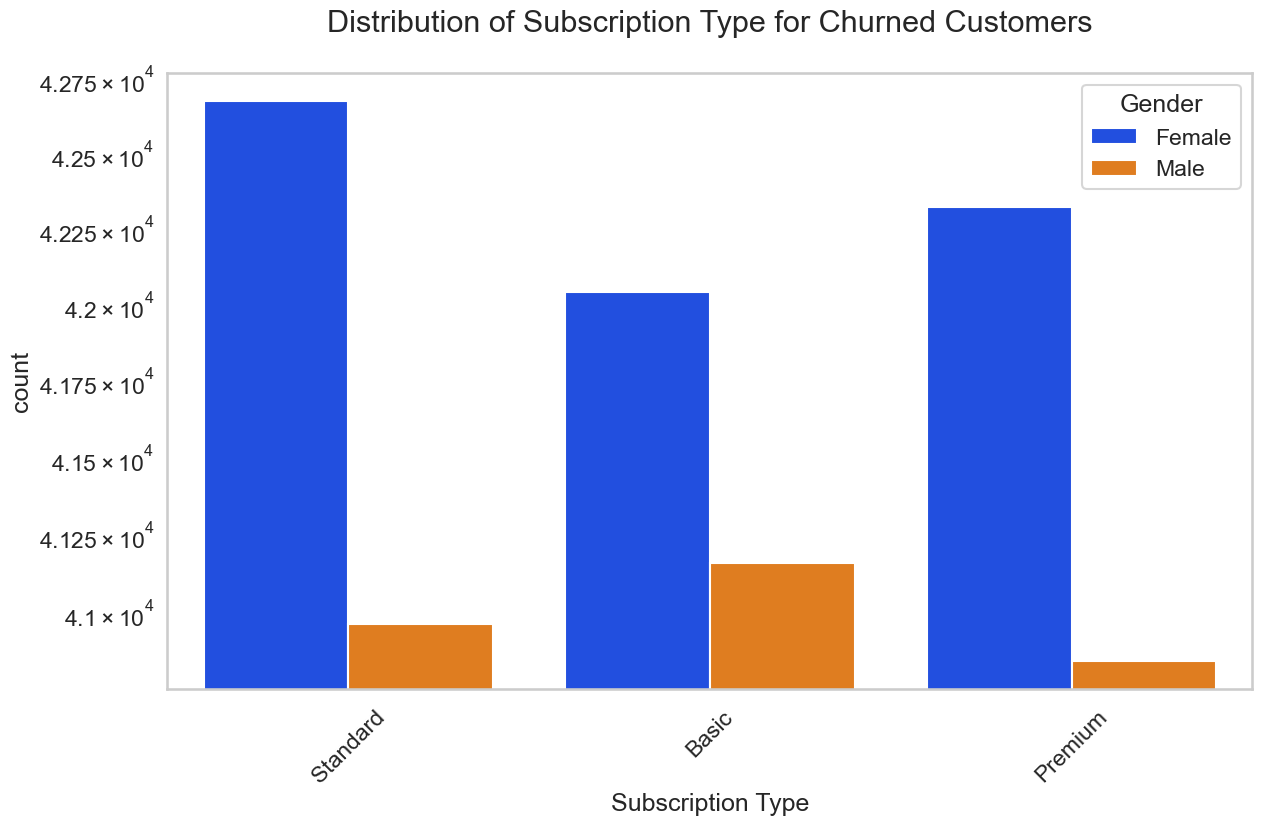

In [76]:
uniplot(new_df1_target1,col='Subscription Type',title='Distribution of Subscription Type for Churned Customers',hue='Gender')

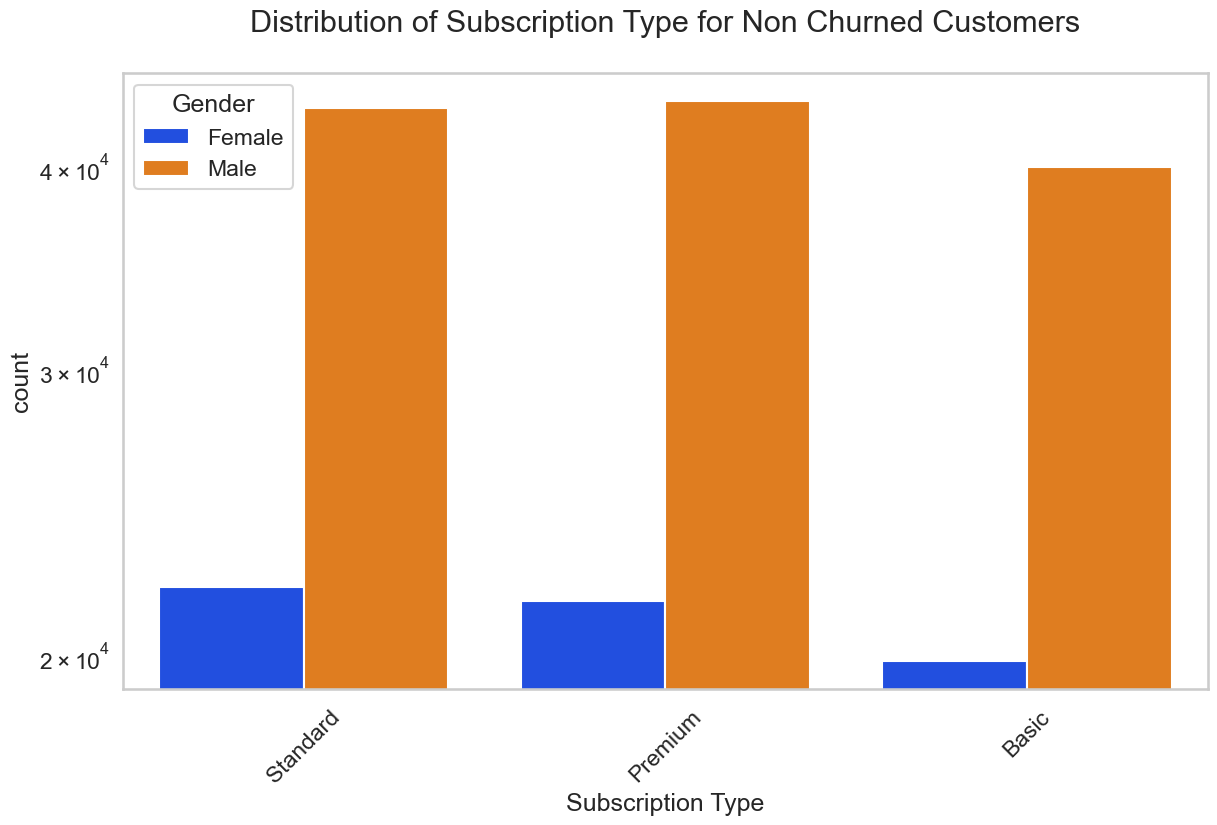

In [77]:
uniplot(new_df1_target0,col='Subscription Type',title='Distribution of Subscription Type for Non Churned Customers',hue='Gender')

Model Building

In [30]:
#importing libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [31]:
df=churn_data_dummies.copy()

In [32]:
x=df.drop('Churn',axis=1)
x

Age  Usage Frequency  Support Calls  Payment Delay  Total Spend  \
0        30               14              5             18       932.00   
1        65                1             10              8       557.00   
2        55                4              6             18       185.00   
3        58               21              7              7       396.00   
4        23               20              5              8       617.00   
...     ...              ...            ...            ...          ...   
440828   42               15              1              3       716.38   
440829   25               13              1             20       745.38   
440830   26               27              1              5       977.31   
440831   28               14              2              0       602.55   
440832   31               20              1             14       567.77   

        Last Interaction  Gender_Female  Gender_Male  Subscription Type_Basic  \
0                     17              1            0                        0   
1                      6              1            0                        1   
2                      3              1            0                        1   
3                     29              0            1                        0   
4                     20              0            1                        1   
...                  ...            ...          ...                      ...   
440828                 8              0            1                        0   
440829                 2              1            0                        0   
440830                 9              0            1                        0   
440831                 2              0            1                        0   
440832                21              0            1                        0   

        Subscription Type_Premium  Subscription Type_Standard  \
0                               0                           1   
1                               0                           0   
2                               0                           0   
3                               0                           1   
4                               0                           0   
...                           ...                         ...   
440828                          1                           0   
440829                          1                           0   
440830                          0                           1   
440831                          0                           1   
440832                          1                           0   

        Contract Length_Annual  Contract Length_Monthly  \
0                            1                        0   
1                            0                        1   
2                            0                        0   
3                            0                        1   
4                            0                        1   
...                        ...                      ...   
440828                       1                        0   
440829                       1                        0   
440830                       0                        0   
440831                       0                        0   
440832                       0                        0   

        Contract Length_Quarterly  Tenure_group_1 - 12  Tenure_group_13 - 24  \
0                               0                    0                     0   
1                               0                    0                     0   
2                               1                    0                     1   
3                               0                    0                     0   
4                               0                    0                     0   
...                           ...                  ...                   ...   
440828                          0                    0                     0   
4408

In [33]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler on your training data and transform it
x = scaler.fit_transform(x)

In [34]:
y=df['Churn']
y

0         1
1         1
2         1
3         1
4         1
         ..
440828    0
440829    0
440830    0
440831    0
440832    0
Name: Churn, Length: 440832, dtype: int32

In [35]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [36]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [37]:
!pip install --upgrade threadpoolctl

Defaulting to user installation because normal site-packages is not writeable


Train Test Split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [39]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [40]:
# GB 
model_GB = GradientBoostingClassifier(random_state=12345)
model_GB.fit(x_train, y_train)
y_pred = model_GB.predict(x_test)
model_GB.score(x_test,y_test)

0.9971644719679699

In [41]:
# Classification Report for XGB Model
print(classification_report(model_GB.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     38389
           1       1.00      1.00      1.00     49778

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



Handling the imbalanced dataset

In [42]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [43]:
from imblearn.combine import SMOTEENN

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)   
X_resampled, y_resampled = sm.fit_resample(x, y.ravel())

In [67]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
print('After upsampling count of label 0 {}'.format(sum(y_resampled==0)))
print('After upsampling count of label 1 {}'.format(sum(y_resampled==1)))

Before upsampling count of label 0 152684
Before upsampling count of label 1 199981
After upsampling count of label 0 249999
After upsampling count of label 1 249999


In [47]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [48]:
# GB 
model_GB = GradientBoostingClassifier(random_state=12345)
model_GB.fit(xr_train, yr_train)
yr_pred = model_GB.predict(xr_test)
model_GB.score(xr_test,yr_test)
accuracy_GB = accuracy_score(yr_test, yr_pred)

In [49]:
model_GB.score(xr_test,yr_test)

0.9975

In [50]:
# Classification Report for XGB Model
print(classification_report(model_GB.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     38398
           1       0.99      1.00      1.00     49769

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [51]:
# LGBM 
model_LGBM = LGBMClassifier(random_state=12345)
model_LGBM.fit(xr_train, yr_train)
yr_pred = model_LGBM.predict(xr_test)
model_LGBM.score(xr_test,yr_test)
accuracy_LGBM = accuracy_score(yr_test, yr_pred)

[LightGBM] [Info] Number of positive: 200089, number of negative: 199909
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1569
[LightGBM] [Info] Number of data points in the train set: 399998, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500225 -> initscore=0.000900
[LightGBM] [Info] Start training from score 0.000900


In [52]:
model_LGBM.score(xr_test,yr_test)

0.99911

In [53]:
# Classification Report for LGBM Model
print(classification_report(model_LGBM.predict(xr_test),yr_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50173
           1       1.00      1.00      1.00     49827

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000



In [54]:
# RF 
model_RF = RandomForestClassifier(random_state=123456)
model_RF.fit(xr_train, yr_train)
yr_pred = model_RF.predict(xr_test)

In [55]:
model_RF.score(xr_test,yr_test)

0.99891

In [56]:
# Classification Report for RF Model
print(classification_report(model_RF.predict(xr_test),yr_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50191
           1       1.00      1.00      1.00     49809

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000



In [57]:
# LR 
model_LR = LogisticRegression(random_state=123456)
model_LR.fit(xr_train, yr_train)
yr_pred = model_LR.predict(xr_test)

In [58]:
model_LR.score(xr_test,yr_test)

0.9016

In [59]:
# Classification Report for LR Model
print(classification_report(model_LR.predict(xr_test),yr_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     52902
           1       0.87      0.93      0.90     47098

    accuracy                           0.90    100000
   macro avg       0.90      0.90      0.90    100000
weighted avg       0.90      0.90      0.90    100000



Hyperparameter Tuning

In [60]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create the LightGBM classifier
model_LGBM = LGBMClassifier(random_state=12345)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    
}

# Create GridSearchCV object
grid_search = GridSearchCV(model_LGBM, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(xr_train, yr_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
yr_pred = best_model.predict(xr_test)

# Calculate accuracy on the test set
accuracy_LGBM = accuracy_score(yr_test, yr_pred)

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Accuracy on Test Set:", accuracy_LGBM)


[LightGBM] [Info] Number of positive: 200089, number of negative: 199909
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1569
[LightGBM] [Info] Number of data points in the train set: 399998, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500225 -> initscore=0.000900
[LightGBM] [Info] Start training from score 0.000900
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Accuracy on Test Set: 0.99916


In [62]:
# Evaluate the LightGBM model using cross-validation
kfold = KFold(n_splits=10)
cv_results = cross_val_score(best_model, x, y, cv=kfold, scoring="accuracy")

# Print the mean and standard deviation of accuracy scores
print(f"LightGBM: Mean Accuracy = {cv_results.mean():.4f}, Std Dev = {cv_results.std():.4f}")


[LightGBM] [Info] Number of positive: 207243, number of negative: 189505
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 396748, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.522354 -> initscore=0.089477
[LightGBM] [Info] Start training from score 0.089477
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 205915, number of negative: 190833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 396748, number of used features: 19
[Ligh

In [63]:
# Classification Report for best Model
print(classification_report(best_model.predict(xr_test),yr_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50172
           1       1.00      1.00      1.00     49828

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000



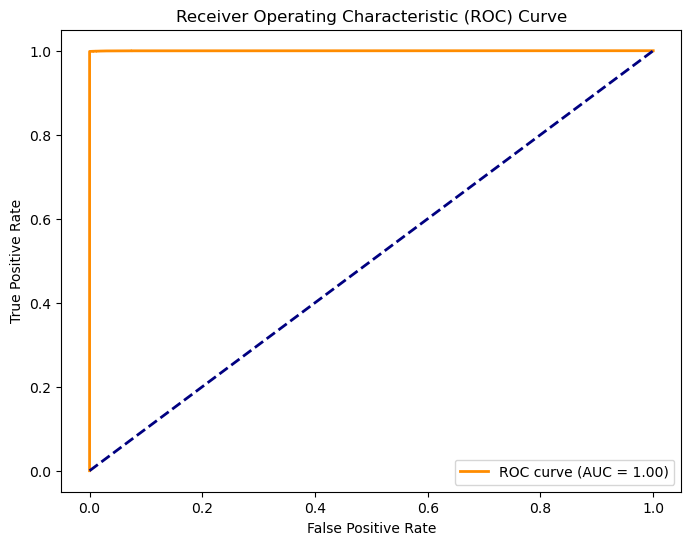

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
yr_probs = best_model.predict_proba(xr_test)[:, 1]

# ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(yr_test, yr_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 39674
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 39674, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

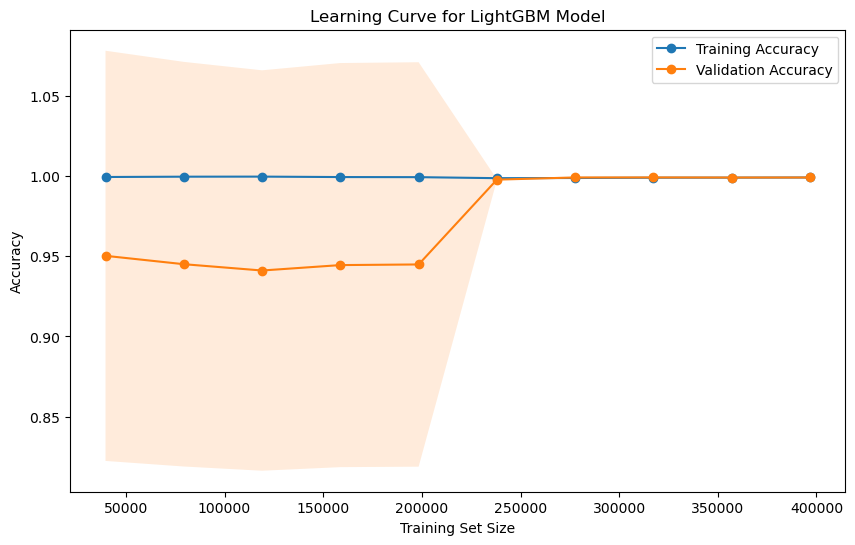

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Set up the learning curve parameters
train_sizes, train_scores, valid_scores = learning_curve(
    best_model, x, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)

plt.plot(train_sizes, valid_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for LightGBM Model')
plt.legend()
plt.show()


Saving the model

In [69]:
#saving the best model
import pickle
filename = 'model.sav'
pickle.dump(best_model, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score_r1 = load_model.score(xr_test, yr_test)
model_score_r1

0.99916